## Global Power Plant Database-
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
#Importing Libararies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('database_IND.csv')


In [5]:
# Reading first 5 rows
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
#reading last 5 rows
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("The shape of dataset is :",df.shape)

The shape of dataset is : (907, 27)


__We have 907 rows and 27 columns in our dataset__

In [8]:
#delete duplicate entry if any
df.drop_duplicates()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [10]:
#Checking for info of the columns like- datatype,memory and index.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

__Our dataset contain 12 object datatype and 15 float datatype. Also here is an indication of null value present in our dataset so lts check for Null values__

In [11]:
df.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [12]:
#total null values count present in our dataset
df.isnull().sum().sum()

10445

__Alot of null values present in our dataset .we can drop few columns which have all the null values present in all the rows.
like-wepp_id,other_fuel3. Before dropping let us look in the other columns as well__


In [13]:
#Before dropping country_long is showing only single entry for India so we can also drop this column
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [14]:
#like 'country_long',the 'country'column is alsoshowing singlr entry for India so we can drop this as well
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [15]:
df['url'].nunique()
## 304 are unique entried but Url has no imact on the target label so we can drop this column as well


304

In [16]:
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [17]:
# dropiing 'country' and 'country_long' as  both of the columns have single entry
df=df.drop(['country','country_long'],axis=1)
df.shape

(907, 25)

__Checkiing values with 0 entries__

In [18]:
df['estimated_generation_gwh'].nunique()


0

In [19]:
df['wepp_id'].nunique()


0

In [20]:
df['other_fuel3'].nunique()

0

In [21]:
## Dropping those columns whcih have no values in their rows
df=df.drop(['estimated_generation_gwh','wepp_id','other_fuel3'],axis=1)
df.shape

(907, 22)

In [22]:
print("Total value counts",df['generation_gwh_2013'].value_counts())
print("unique values ",df['generation_gwh_2013'].nunique())


Total value counts Series([], Name: generation_gwh_2013, dtype: int64)
unique values  0


In [23]:
print("Total value counts",df['generation_gwh_2019'].value_counts())
print("unique values ",df['generation_gwh_2019'].nunique())


Total value counts Series([], Name: generation_gwh_2019, dtype: int64)
unique values  0


In [24]:
#dropping thses 2 columns generation_gwh_2013 and generation_gwh_2019 as well -0 entries
df=df.drop(['generation_gwh_2013','generation_gwh_2019'],axis=1)
df.shape

(907, 20)

In [23]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [25]:
#exploring other columns as well
df['name'].value_counts()
#this column show name or title of the power plant

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [26]:
df['gppd_idnr'].value_counts()
#this column shows 10 or 12 character identifier for the power plant

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

That means both of the columns 'name' an 'gppd_idnr' serving the same purpose of recognising the plant so we can drop gppd_idnr as it seems conviniet to remember name rather than rememebring the iD

In [27]:
df=df.drop('gppd_idnr',axis=1)
df.shape

(907, 19)

In [28]:
df['other_fuel2'].value_counts()
## we got single entry in this entire column ,lets check for other values for the same oil in other columns


Oil    1
Name: other_fuel2, dtype: int64

In [29]:
#getting the row number

fuel2=np.where(df['other_fuel2']=='Oil')
fuel2

(array([811], dtype=int64),)

In [30]:
plant=df.iloc[812,:]
plant

name                                    TORR POWER SAB.
capacity_mw                                       422.0
latitude                                        23.0701
longitude                                       72.5933
primary_fuel                                       Coal
other_fuel1                                         Oil
other_fuel2                                         NaN
commissioning_year                               1985.0
owner                                               NaN
source                    Central Electricity Authority
url                              http://www.cea.nic.in/
geolocation_source                                  WRI
year_of_capacity_data                            2019.0
generation_gwh_2014                              2720.0
generation_gwh_2015                              2189.0
generation_gwh_2016                              2521.0
generation_gwh_2017                             2406.44
generation_gwh_2018                             

In [31]:
##Now we know detils of this column, let us drop the column ,fuel2

df=df.drop('other_fuel2',axis=1)
df.shape

(907, 18)

In [32]:
# also url has nothing to do with the target label lets drop this columns as well
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

In [33]:
df['url'].nunique()

304

In [34]:
df=df.drop('url',axis=1)
df.shape

(907, 17)

In [35]:
#again check for columns
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [36]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [37]:
df['generation_data_source'].nunique()

1

Here is single entry for entire column that means its has no major impact on target variable. so we can drop it as well.

In [38]:
df=df.drop('generation_data_source',axis=1)
df.shape

(907, 16)

We can drop latitude and longitude now, before we will make a new column to get the city name using those coordinates.. it will help to analyze

In [39]:
location=['latitude','longitude']
for i in location:
    print(df[i].nunique())

836
827


We can see there are 837 unique latitude values and 828 unique longitude values. i.e we can tell that there are multiple powerplants in few locations.

In [40]:
#Making a single column with co ordinates. Now we will drop latitude and longitude
df['geo_location']=df[location].apply(lambda x:','.join(x.values.astype(str)),axis=1)
df['geo_location']

0      28.1839,73.2407
1       24.7663,74.609
2      21.9038,69.3732
3      23.8712,91.3602
4      21.9603,82.4091
            ...       
902    16.2949,77.3568
903    12.8932,78.1654
904    15.2758,75.5811
905      24.35,73.7477
906     9.9344,77.4768
Name: geo_location, Length: 907, dtype: object

In [41]:
#drop the columns
df=df.drop(['latitude','longitude'],axis=1)
df.shape

(907, 15)

We dropped the columns latitude and longitude

now we will get the names of city and state based on coordinates

In [42]:
#pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [43]:
from geopy.geocoders import Nominatim
# initialize Nominatim API 

In [44]:


geolocator = Nominatim(user_agent="locfinder",timeout=10)
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [45]:
df['geo_location'][0]


'28.1839,73.2407'

In [46]:
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm
df['address']=df['geo_location'].apply(geocode)

In [47]:
df['address']


0      (Badrasar, Bikaner Tehsil, Bikaner District, R...
1      (Kesarpura, Chittaurgarh Tehsil, Chittorgarh D...
2      (Lamba, Kalyanpur Taluka, Devbhumi Dwaraka Dis...
3      (Agartala, Mohanpur, West Tripura, Tripura, 79...
4      (Akaltara-KMPCL Coal Power Plant, Akaltara Tah...
                             ...                        
902    (Yermarus Thermal Power Station, Eganuru, Raya...
903    (Yalesandra, Bangarapet taluk, Kolar district,...
904    (Elishirura, Gadag taluk, Gadag district, Karn...
905    (Zawar, Sarada Tehsil, Udaipur District, Rajas...
906    (Theni, Theni District, Tamil Nadu, India, (9....
Name: address, Length: 907, dtype: object

In [48]:
#Dummy data frame to split and store the address 
dl=df.address.apply(lambda x: pd.Series(str(x).split(",")))
dl

,0,1,2,3,4,5,6,7,8,9
0,Badrasar,Bikaner Tehsil,Bikaner District,Rajasthan,India,NaN,NaN,NaN,NaN,NaN
1,Kesarpura,Chittaurgarh Tehsil,Chittorgarh District,Rajasthan,312613,India,NaN,NaN,NaN,NaN
2,Lamba,Kalyanpur Taluka,Devbhumi Dwaraka District,Gujarat,India,NaN,NaN,NaN,NaN,NaN
3,Agartala,Mohanpur,West Tripura,Tripura,799001,India,NaN,NaN,NaN,NaN
4,Akaltara-KMPCL Coal Power Plant,Akaltara Tahsil,Janjgir-Champa,Chhattisgarh,India,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
902,Yermarus Thermal Power Station,Eganuru,Rayachuru taluku,Raichur district,Karnataka,India,NaN,NaN,NaN,NaN
903,Yalesandra,Bangarapet taluk,Kolar district,Karnataka,563129,India,NaN,NaN,NaN,NaN
904,Elishirura,Gadag taluk,Gadag district,Karnataka,582120,India,NaN,NaN,NaN,NaN
905,Zawar,Sarada Tehsil,Udaipur District,Rajasthan,313901,India,NaN,NaN,NaN,NaN


we splitted and stored the addresses into new df by splitting, we need only state



In [49]:
#Checking for columns
df.columns

Index(['name', 'capacity_mw', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'geo_location', 'address'],
      dtype='object')

In [50]:
df.shape

(907, 16)

In [51]:
#for model we dont require location and coordinates
df=df.drop(['geo_location','address'],axis=1)
df.shape

(907, 14)

In [52]:
gen=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for i in gen:
    print(f'Skewness in {i}:',df[i].skew())

Skewness in generation_gwh_2014: 3.3427065529048723
Skewness in generation_gwh_2015: 3.6659035599928425
Skewness in generation_gwh_2016: 3.51237023685823
Skewness in generation_gwh_2017: 3.5660698351736864
Skewness in generation_gwh_2018: 3.4762983265664795


In [53]:
df[gen].isnull().sum()

generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [54]:
#skewness is more, so let us fill it with median
for i in gen:
    df[i]=df[i].fillna(df[i].median())

In [55]:
df[gen].isnull().sum()

generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [56]:
#again cheking for null
df.isnull().sum()

name                       0
capacity_mw                0
primary_fuel               0
other_fuel1              709
commissioning_year       380
owner                    565
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014        0
generation_gwh_2015        0
generation_gwh_2016        0
generation_gwh_2017        0
generation_gwh_2018        0
dtype: int64

In [57]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [58]:
df['year_of_capacity_data'].nunique()

1

In [59]:
## This columns also has single entry for 519 rows so we can easily drop it.
df=df.drop('year_of_capacity_data',axis=1)
df.shape

(907, 13)

In [60]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [61]:
df['commissioning_year'].nunique()

73

let us make this column into no. of years since commisioned , to be helpful



In [62]:
df['years_old']=2023-df['commissioning_year']
df['years_old']

0      12.0
1       NaN
2       NaN
3      19.0
4       8.0
       ... 
902     7.0
903     NaN
904     NaN
905     NaN
906     NaN
Name: years_old, Length: 907, dtype: float64

we made a new column with years_old



In [63]:
#lets drop now commissioning_year
df=df.drop('commissioning_year',axis=1)
df.shape

(907, 13)

In [64]:
df['years_old'].describe()

count    527.000000
mean      25.908918
std       17.082868
min        5.000000
25%       11.000000
50%       22.000000
75%       35.000000
max       96.000000
Name: years_old, dtype: float64

In [65]:
#we will fill it with mean or median , to decide we wil check skewness
df['years_old'].skew()

1.0679491152019276

In [66]:
#it has more skewness, so we will fill with median
df['years_old']=df['years_old'].fillna(df['years_old'].median())

In [67]:
df['years_old'].isnull().sum()

0

In [68]:
df['geolocation_source'].value_counts()


WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [69]:
df['geolocation_source'].nunique()

3

In [70]:
#dropping this column as well
df=df.drop('geolocation_source',axis=1)


In [71]:
df.shape

(907, 12)

In [72]:
df.columns

Index(['name', 'capacity_mw', 'primary_fuel', 'other_fuel1', 'owner', 'source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'years_old'],
      dtype='object')

In [73]:
df['name']

0                  ACME Solar Tower
1               ADITYA CEMENT WORKS
2          AES Saurashtra Windfarms
3                       AGARTALA GT
4                      AKALTARA TPP
                   ...             
902                    YERMARUS TPP
903    Yelesandra Solar Power Plant
904    Yelisirur wind power project
905                     ZAWAR MINES
906         iEnergy Theni Wind Farm
Name: name, Length: 907, dtype: object

In [74]:
# name column also not required
df=df.drop('name',axis=1)
df.shape

(907, 11)

In [75]:
#checking for primary_fuel column
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [76]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [80]:
df['other_fuel1'].nunique()

3

In [78]:
199/907

0.21940463065049615

only 22% of the power plants are using other fuel along with primary



In [81]:
#Let us replace the missing values with text no
df['other_fuel1']=df['other_fuel1'].fillna('no')

In [82]:
df['other_fuel1'].isnull().sum()

0

In [83]:
df['other_fuel1'].value_counts()


no              709
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [85]:
df['owner'].isnull().sum()

565

In [86]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [87]:
# As it seems owner is also not required
df=df.drop('owner',axis=1)
df.shape

(907, 10)

In [91]:
df['source']

0      National Renewable Energy Laboratory
1                      Ultratech Cement ltd
2                                       CDM
3             Central Electricity Authority
4             Central Electricity Authority
                       ...                 
902           Central Electricity Authority
903     Karnataka Power Corporation Limited
904                                     CDM
905                      Hindustan Zinc ltd
906                                     CDM
Name: source, Length: 907, dtype: object

In [92]:
## Dropping source column
df=df.drop('source',axis=1)
df.shape

(907, 9)

__We have dropped the columns so far__<br>
1-country'<br>
2-country_long<br>
3-estimated_generation_gwh<br>
4-wepp_id<br>
5-other_fuel3<br>
6-generation_gwh_2013<br>
7-generation_gwh_2019<br>
8-gppd_idnr<br>
9-other_fuel2<br>
10-url<br>
11-latitude<br>
12-longitude<br>
13-year_of_capacity_data<br>
14-geolocation_source<br>
15-name<br>
16-owner<br>
17-source<br>


In [94]:
df.columns

Index(['capacity_mw', 'primary_fuel', 'other_fuel1', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'years_old'],
      dtype='object')

__we have handled null values, so we can check the Statistics now___


In [97]:
df.describe()

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,years_old
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,24.271224
std,590.085456,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,16.725000,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
50%,59.200000,801.123775,711.181225,737.205450,817.977250,751.644375,22.000000
75%,385.250000,801.123775,711.181225,737.205450,817.977250,751.644375,25.000000
max,4760.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,96.000000


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

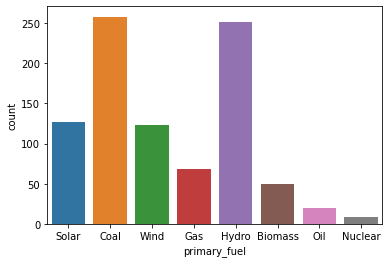

In [98]:
#exploring the column
sns.countplot(df['primary_fuel'])


The count of Coal and Hydro fuels are the most used as fuel in the power genertaion

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

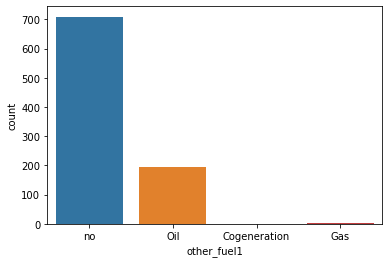

In [99]:
sns.countplot(df['other_fuel1'])


<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

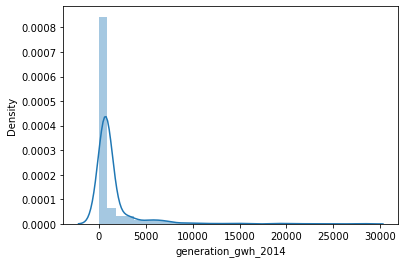

In [101]:
sns.distplot(df['generation_gwh_2014'])

Its right skewed that means we have some outleirs  present in this column


<AxesSubplot:xlabel='generation_gwh_2014'>

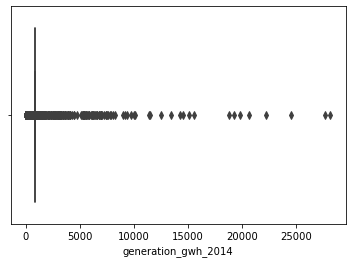

In [102]:
sns.boxplot(df['generation_gwh_2014'])

__Outliers are present we can ignore the contnous outliers but those outliers who are present at distance  need to be removed later in the project__

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

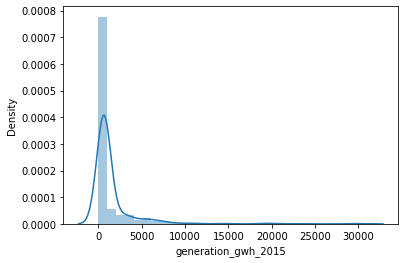

In [103]:
sns.distplot(df['generation_gwh_2015'])

Its right skewed that means we have some outleirs  present in this column


<AxesSubplot:xlabel='generation_gwh_2015'>

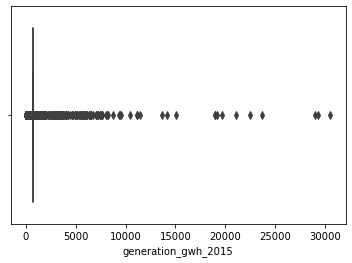

In [105]:
sns.boxplot(df['generation_gwh_2015'])

__Outliers present in this column__

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

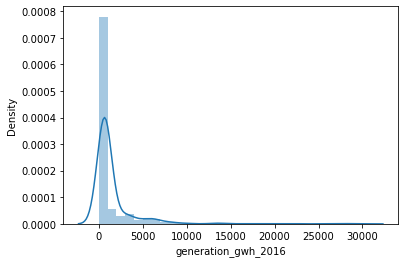

In [107]:
#cheking for 'generation_gwh_2016 column
sns.distplot(df['generation_gwh_2016'])

Its right skewed that means we have some outleirs  present in this column,letscheck with the boxplot as well


<AxesSubplot:xlabel='generation_gwh_2016'>

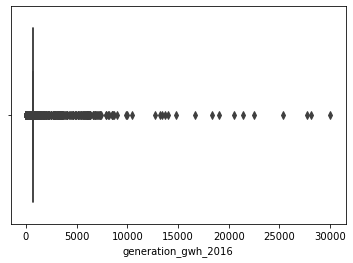

In [110]:
sns.boxplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

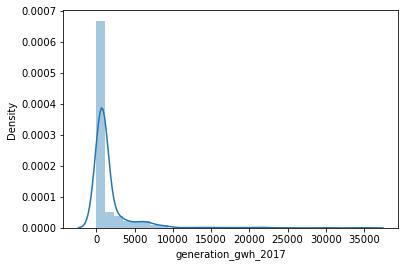

In [109]:
#cheking for 'generation_gwh_2017 column
sns.distplot(df['generation_gwh_2017'])

Its right skewed that means we have some outleirs  present in this column,lets check with the boxplot as well


<AxesSubplot:xlabel='generation_gwh_2017'>

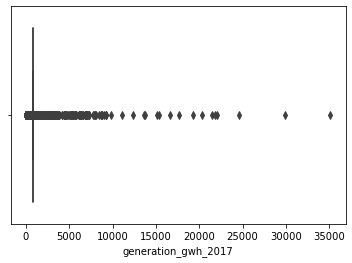

In [111]:
sns.boxplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

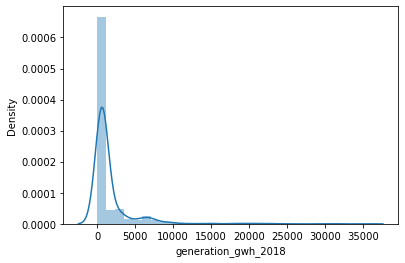

In [112]:
#cheking for 'generation_gwh_2017 column
sns.distplot(df['generation_gwh_2018'])

Its right skewed that means we have some outleirs  present in this column,lets check with the boxplot as well


<AxesSubplot:xlabel='generation_gwh_2018'>

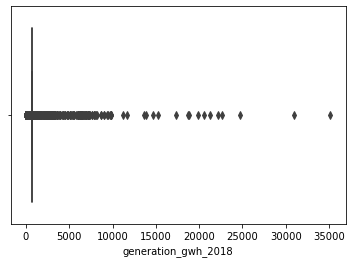

In [113]:
sns.boxplot(df['generation_gwh_2018'])

<AxesSubplot:xlabel='years_old', ylabel='Density'>

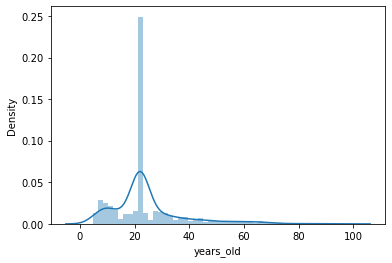

In [114]:
#cheking for 'years_old' column
sns.distplot(df['years_old'])

its also has some skewness.. Lets check with boxplot as well


<AxesSubplot:xlabel='years_old'>

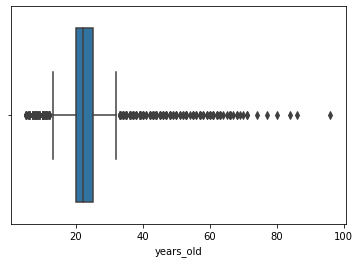

In [115]:
sns.boxplot(df['years_old'])

In [119]:
### Lets encode the columns with object datatype

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
enc=['primary_fuel','other_fuel1']
for i in enc:
    df[i]=le.fit_transform(df[i])

In [121]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [122]:
df['other_fuel1'].value_counts()

3    709
2    195
1      2
0      1
Name: other_fuel1, dtype: int64

In [123]:
## Checking the skewness using .skew() method
df.skew()

capacity_mw            3.123576
primary_fuel           0.472251
other_fuel1           -1.626786
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
years_old              1.719575
dtype: float64

__With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.__

## Removing outliers using zscore method


In [124]:
from scipy.stats import zscore

In [125]:
z=abs(zscore(df))
z

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,years_old
0,0.548908,1.225688,0.519008,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.386977,0.967877,0.519008,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,0.486679,1.664401,0.519008,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,0.324240,0.529164,0.519008,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,2.498942,0.967877,1.811388,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...,...,...
902,2.159821,0.967877,1.811388,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.548060,1.225688,0.519008,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.509909,1.664401,0.519008,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.417498,0.967877,0.519008,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [126]:
thershold=3
df_new=df[(z<3).all(axis=1)]
df_new.shape

(859, 9)

In [127]:
print("old dataset shape",df.shape)
print("new dataset shape",df_new.shape)

old dataset shape (907, 9)
new dataset shape (859, 9)


In [128]:
dataloss=(907-859)/907*100
print("Dataloss",dataloss)

Dataloss 5.2921719955898565


In [129]:
## We lost 5% of data which is accetable, again cheking skewness
df_new.skew()

capacity_mw            2.017482
primary_fuel           0.418156
other_fuel1           -1.519122
generation_gwh_2014    2.989756
generation_gwh_2015    2.789805
generation_gwh_2016    2.727030
generation_gwh_2017    2.622766
generation_gwh_2018    2.689111
years_old              1.262011
dtype: float64

__Skewness is still there , now using np.sqrt method toh remove skewness__

In [130]:
#we will reduce skewness in all generation columns
for i in gen:
    df_new[i]=df_new[i]+1
    df_new[i]=np.sqrt(df_new[i])

In [131]:
df_new['years_old']=np.sqrt(df_new['years_old'])


In [132]:
df_new.skew()

capacity_mw            2.017482
primary_fuel           0.418156
other_fuel1           -1.519122
generation_gwh_2014    1.553754
generation_gwh_2015    1.527199
generation_gwh_2016    1.479482
generation_gwh_2017    1.344684
generation_gwh_2018    1.451831
years_old              0.374341
dtype: float64

Lets plot boxplot for dataset

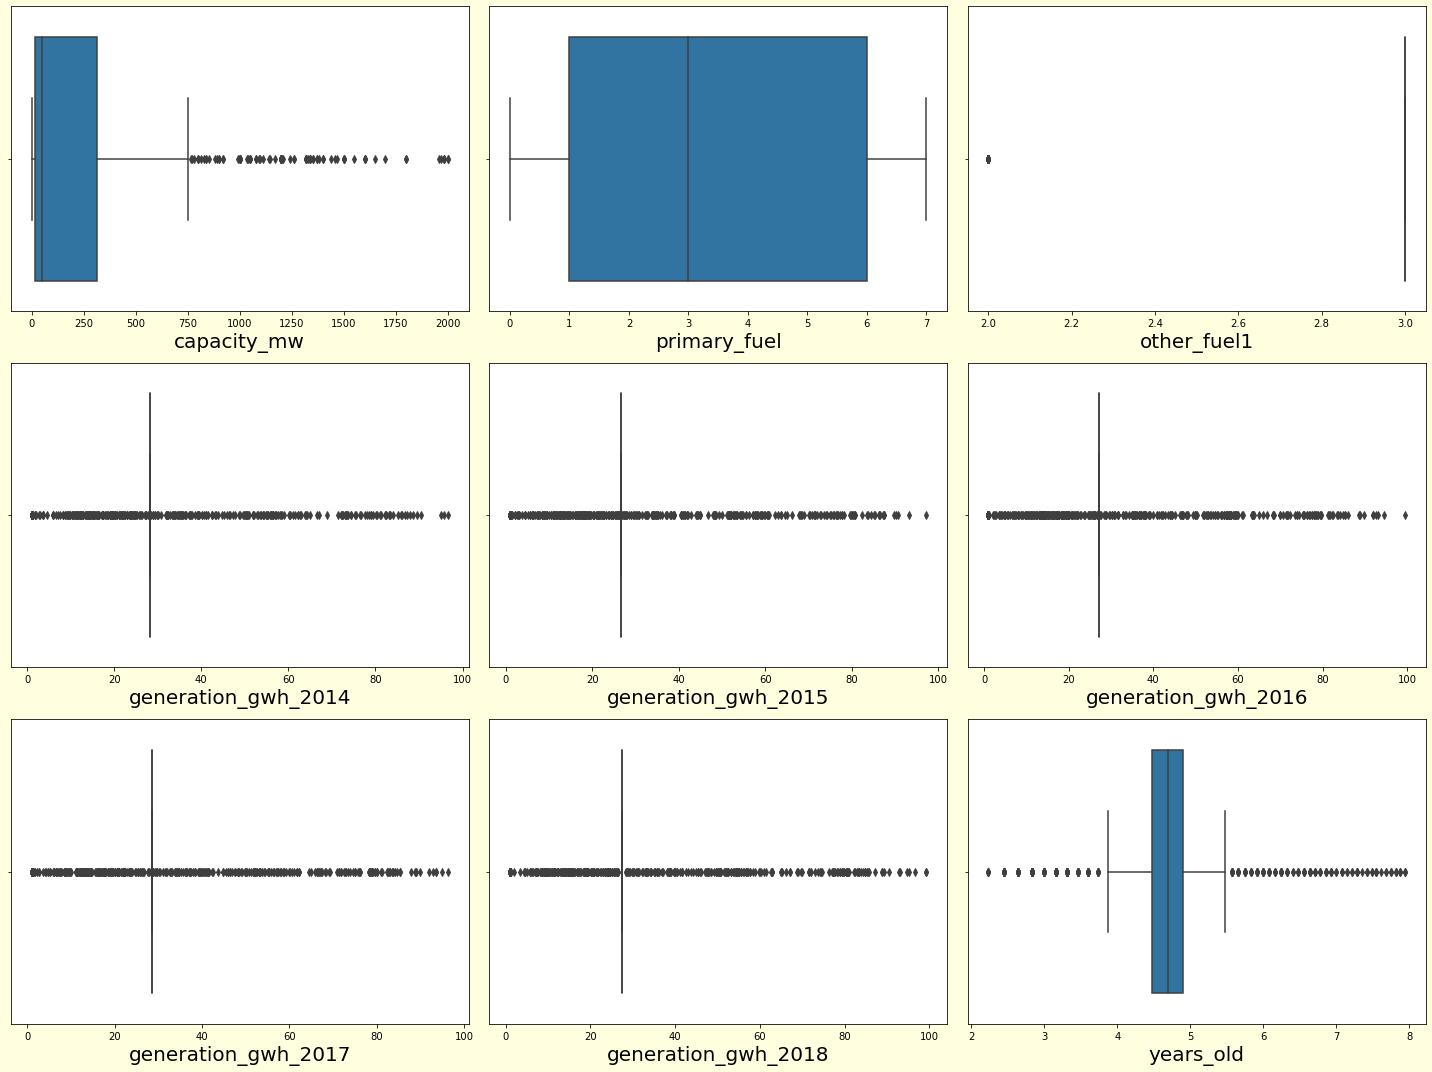

In [134]:
plt.figure(figsize=(20,15),facecolor='lightyellow')
plot_number=1

for column in df_new:
    if plot_number<=9:
        ax=plt.subplot(3,3,plot_number)
        sns.boxplot(df_new[column]) 
        plt.xlabel(column,fontsize=20)
        
        
    plot_number +=1
    
    
plt.tight_layout() 
        

__Here Outliers are present in continus form that means e can contain them in our dataset__

#### Checking the correlation
 

In [136]:
df_new.corr()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,years_old
capacity_mw,1.000000,-0.398551,-0.631920,0.578784,0.636993,0.715481,0.715385,0.731776,-0.282138
primary_fuel,-0.398551,1.000000,0.480509,-0.189450,-0.215096,-0.230176,-0.216098,-0.231379,0.114588
other_fuel1,-0.631920,0.480509,1.000000,-0.439158,-0.472267,-0.517315,-0.509290,-0.516636,0.348168
generation_gwh_2014,0.578784,-0.189450,-0.439158,1.000000,0.884974,0.807262,0.754940,0.749720,-0.055581
generation_gwh_2015,0.636993,-0.215096,-0.472267,0.884974,1.000000,0.903968,0.823238,0.814841,-0.123009
generation_gwh_2016,0.715481,-0.230176,-0.517315,0.807262,0.903968,1.000000,0.932975,0.918352,-0.209088
generation_gwh_2017,0.715385,-0.216098,-0.509290,0.754940,0.823238,0.932975,1.000000,0.962960,-0.205075
generation_gwh_2018,0.731776,-0.231379,-0.516636,0.749720,0.814841,0.918352,0.962960,1.000000,-0.203392
years_old,-0.282138,0.114588,0.348168,-0.055581,-0.123009,-0.209088,-0.205075,-0.203392,1.000000


### Correlation using a Heatmap

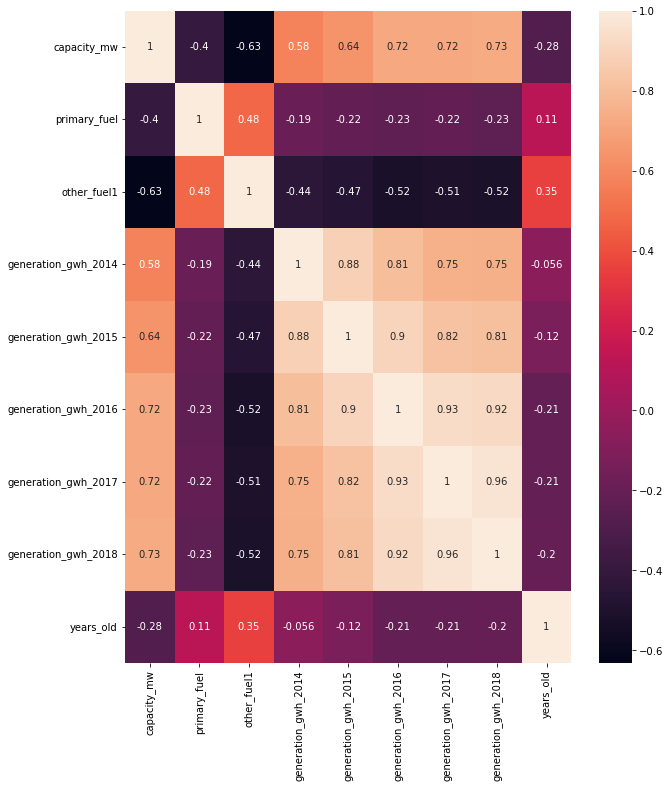

In [138]:
plt.figure(figsize=(10,12))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

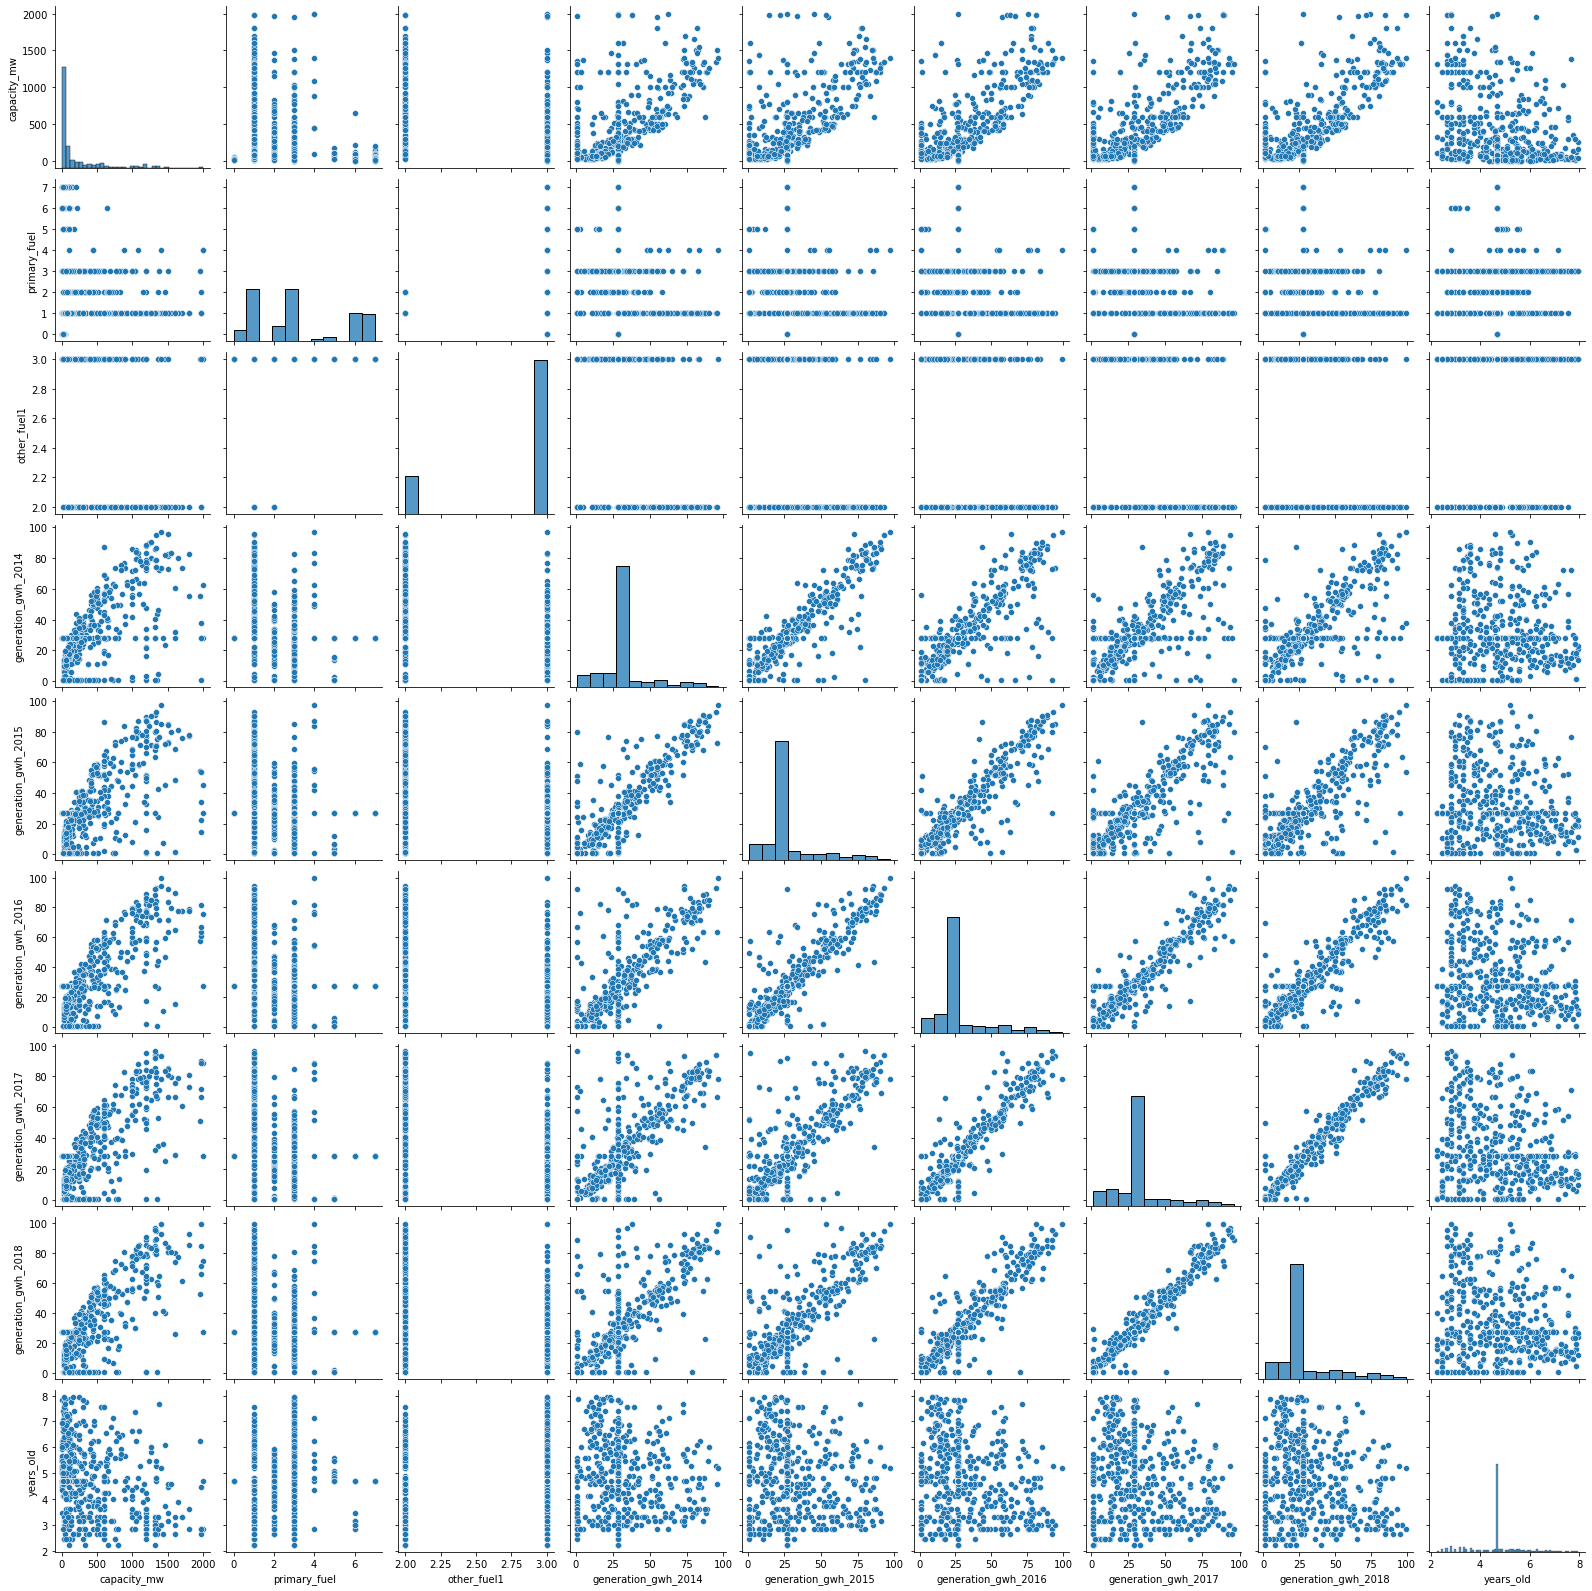

In [139]:
# Plotting pairplot for dataset
sns.pairplot(df_new)


In [140]:
## As we have less columns left,so we can have all the columns in this dataset.

## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label-
## Task 1-Finding the type of primary fuel

In [141]:
x=df_new.drop('primary_fuel',axis=1)
y=df_new['primary_fuel']

### Scaling the features

In [143]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.62573119,  0.49672366, -0.14177857, ..., -0.14867169,
        -0.18067046, -1.10925211],
       [-0.396434  ,  0.49672366, -0.14177857, ..., -0.14867169,
        -0.18067046, -0.00351657],
       [-0.53761385,  0.49672366, -0.14177857, ..., -0.14867169,
        -0.18067046, -0.00351657],
       ...,
       [-0.57050779,  0.49672366, -0.14177857, ..., -0.14867169,
        -0.18067046, -0.00351657],
       [-0.43965232,  0.49672366, -0.14177857, ..., -0.14867169,
        -0.18067046, -0.00351657],
       [-0.59211695,  0.49672366, -0.14177857, ..., -0.14867169,
        -0.18067046, -0.00351657]])

In [156]:
#importing different models 
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Finding best random state for building Models

In [146]:

maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)


Best accuracy score is 69.18604651162791 on Random State 704


__split the dataset at 704 random_state__

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=704)

In [152]:
print("Shape of x_train",x_train.shape)    
print("Shape of x_test",x_test.shape)    
print("Shape of y_train",y_train.shape)    
print("Shape of y_test",y_test.shape)  

Shape of x_train (687, 8)
Shape of x_test (172, 8)
Shape of y_train (687,)
Shape of y_test (172,)


## Machine Learning Model for Classification with Evaluation Metrics

In [158]:

# Classification Model Function

def classify(clf, x_scaled, y):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=704)
    
    # Training the model
    clf.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = clf.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(clf, x_scaled, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

## Logistic Regression


In [159]:
clf=LogisticRegression()
classify(clf, x_scaled, y)

Accuracy Score: 0.6918604651162791

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.93      0.78      0.85        50
           2       0.50      0.10      0.17        10
           3       0.68      0.80      0.73        45
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1
           6       0.78      0.85      0.82        34
           7       0.35      0.57      0.43        23

    accuracy                           0.69       172
   macro avg       0.53      0.43      0.44       172
weighted avg       0.70      0.69      0.68       172

Cross Validation Score: 0.5599619203046375

Accuracy Score - Cross Validation Score is 0.13189854481164154


## Decision Tree


In [160]:
clf=DecisionTreeClassifier()
classify(clf, x_scaled, y)

Accuracy Score: 0.7558139534883721

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.81      0.86      0.83        50
           2       0.46      0.60      0.52        10
           3       0.97      0.84      0.90        45
           4       1.00      0.67      0.80         3
           5       0.00      0.00      0.00         1
           6       0.82      0.79      0.81        34
           7       0.57      0.52      0.55        23

    accuracy                           0.76       172
   macro avg       0.61      0.58      0.58       172
weighted avg       0.78      0.76      0.77       172

Cross Validation Score: 0.6729022167822658

Accuracy Score - Cross Validation Score is 0.0829117367061063


## RandomForest

In [161]:
clf=RandomForestClassifier()
classify(clf, x_scaled, y)

Accuracy Score: 0.7732558139534884

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.79      0.84      0.82        50
           2       0.83      0.50      0.62        10
           3       0.94      0.98      0.96        45
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1
           6       0.79      0.79      0.79        34
           7       0.55      0.52      0.53        23

    accuracy                           0.77       172
   macro avg       0.65      0.54      0.57       172
weighted avg       0.78      0.77      0.77       172

Cross Validation Score: 0.7078471372229023

Accuracy Score - Cross Validation Score is 0.06540867673058615


## SVC

In [162]:
from sklearn.svm import SVC

In [163]:
clf=SVC()
classify(clf, x_scaled, y)

Accuracy Score: 0.6162790697674418

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.93      0.78      0.85        50
           2       1.00      0.10      0.18        10
           3       0.83      0.87      0.85        45
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.12      0.21        34
           7       0.29      1.00      0.46        23

    accuracy                           0.62       172
   macro avg       0.51      0.36      0.32       172
weighted avg       0.78      0.62      0.58       172

Cross Validation Score: 0.5739290085679315

Accuracy Score - Cross Validation Score is 0.04235006119951035


## KNN

In [164]:
clf=KNeighborsClassifier()
classify(clf, x_scaled, y)

Accuracy Score: 0.7325581395348837

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.68      0.86      0.76        50
           2       0.75      0.30      0.43        10
           3       0.91      0.96      0.93        45
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.83      0.71      0.76        34
           7       0.55      0.48      0.51        23

    accuracy                           0.73       172
   macro avg       0.49      0.45      0.46       172
weighted avg       0.73      0.73      0.72       172

Cross Validation Score: 0.6658710730314157

Accuracy Score - Cross Validation Score is 0.066687066503468


## XGB


In [165]:
import xgboost as xgb

In [166]:
clf=xgb.XGBClassifier()

clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [167]:
classify(clf, x_scaled, y)

Accuracy Score: 0.7790697674418605

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.81      0.84      0.82        50
           2       0.86      0.60      0.71        10
           3       0.98      0.98      0.98        45
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1
           6       0.81      0.76      0.79        34
           7       0.54      0.57      0.55        23

    accuracy                           0.78       172
   macro avg       0.65      0.55      0.58       172
weighted avg       0.80      0.78      0.78       172

Cross Validation Score: 0.7008839929280566

Accuracy Score - Cross Validation Score is 0.07818577451380393


__SVC has least difference between cv_score and acuuracy but it has low accuracy, so we are choosing RandomForest model which has highest accuracy and lowest 2nd lowest accuracy-cvscore difference,SO choosing RandomForestClassifer  as our final model__

### RandomForestModel without Hypertunung

In [168]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pre=rfc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,pre))
print('confusion matrix:\n',confusion_matrix(y_test,pre))
print('classification matrix:\n',classification_report(y_test,pre))

accuracy score: 0.7732558139534884
confusion matrix:
 [[ 2  0  0  0  0  0  2  2]
 [ 1 42  1  0  0  0  1  5]
 [ 1  3  5  1  0  0  0  0]
 [ 1  0  0 44  0  0  0  0]
 [ 0  0  1  1  0  1  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 1  2  0  1  0  0 27  3]
 [ 1  5  0  0  0  1  3 13]]
classification matrix:
               precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.81      0.84      0.82        50
           2       0.71      0.50      0.59        10
           3       0.94      0.98      0.96        45
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.79      0.79      0.79        34
           7       0.57      0.57      0.57        23

    accuracy                           0.77       172
   macro avg       0.51      0.50      0.50       172
weighted avg       0.76      0.77      0.77       172



### Hyper parameter tuning on the best Classification ML Model

In [172]:
param={'n_estimators':[13,15],
      'criterion':['entropy','gini'],
      'max_depth':range(1,50,3),
      'min_samples_split':range(1,50,3),
      'min_samples_leaf':range(1,50,3),
      }

In [173]:
grid=GridSearchCV(rfc,param_grid=param)
grid.fit(x_train,y_train)

print("best params",grid.best_params_)

best params {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 15}


In [174]:
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)

score:  0.7001375224796361
best estimators: RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_split=4,
                       n_estimators=15)


## Final Model with Hypertuned parameters

In [187]:
rf=RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=4,
                       n_estimators=18) 
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:\n',confusion_matrix(y_test,pred))
print('classification matrix:\n',classification_report(y_test,pred))


accuracy score: 0.7906976744186046
confusion matrix:
 [[ 2  0  0  0  0  0  2  2]
 [ 1 42  0  0  0  0  1  6]
 [ 1  2  5  1  0  0  0  1]
 [ 0  0  0 44  0  0  0  1]
 [ 0  0  1  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 1  1  0  1  0  0 26  5]
 [ 1  5  0  0  0  0  1 16]]
classification matrix:
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         6
           1       0.84      0.84      0.84        50
           2       0.83      0.50      0.62        10
           3       0.96      0.98      0.97        45
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1
           6       0.87      0.76      0.81        34
           7       0.50      0.70      0.58        23

    accuracy                           0.79       172
   macro avg       0.67      0.56      0.58       172
weighted avg       0.81      0.79      0.79       172



__Our Model Accuracy score has increases from 0.7732 to .790__
__Saving the model__

### Auc - Roc curve



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


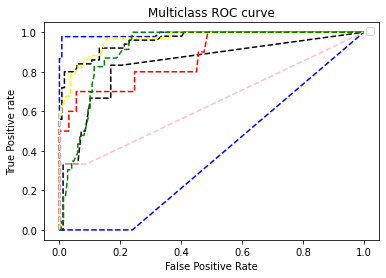

In [188]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

#predicting the probability
pred_prob=rf.predict_proba(x_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
import random
color=['orange','blue','green','red','pink','yellow','black']
# plotting 
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [189]:
#Checking the auc_roc_score:
auc_score=roc_auc_score(y_test,rf.predict_proba(x_test),multi_class='ovr')
auc_score

0.8205317533345977

Probability of prediction to be right is 82.0%



## Saving the model


In [192]:
import pickle

In [193]:
filename='power plant classification.pkl'

In [194]:
pickle.dump(rf,open(filename,'wb'))

In [195]:
#conclusion
loaded_model=pickle.load(open('power plant classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

79.06976744186046


In [196]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predcited','Orignal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
Predcited,7,1,1,6,6,1,3,3,7,3,...,3,3,7,1,1,3,7,2,7,3
Orignal,7,1,1,6,6,1,3,3,7,3,...,3,3,7,1,1,3,7,2,7,3


## Task 2- Predicting capacity_mw (Regression Model)
### Splitting the dataset into 2 variables namely 'xr' and 'yr' for feature and label-


In [197]:
xr=df_new.drop('capacity_mw',axis=1)
yr=df_new['capacity_mw']

In [198]:
#Now we splitted them
print(xr.shape)
print(yr.shape)

(859, 8)
(859,)


### Scaling the features

In [199]:
#Let us scale the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
xr_scaled=scale.fit_transform(xr)

In [200]:
#Let us find the best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
r2=0
rs=0
le=LinearRegression()
for i in range(1500):
    xr_train,xr_test,yr_train,yr_test=train_test_split(xr_scaled,yr,test_size=0.2,random_state=i)
    le.fit(xr_train,yr_train)
    pred=le.predict(xr_test)
    r2s=r2_score(yr_test,pred)
    if r2s>r2:
        r2=r2s
        rs=i
print('Best r2 score:',r2)
print('Best Random state:',i)

Best r2 score: 0.8023411346838087
Best Random state: 1499


__Splitting the feature and label at random state 1499__

In [201]:
xr_train,xr_test,yr_train,yr_test=train_test_split(xr_scaled,yr,test_size=0.2,random_state=1499)


In [202]:
print("Shape of x_train",xr_train.shape)    
print("Shape of x_test",xr_test.shape)    
print("Shape of y_train",yr_train.shape)    
print("Shape of y_test",yr_test.shape)  

Shape of x_train (687, 8)
Shape of x_test (172, 8)
Shape of y_train (687,)
Shape of y_test (172,)


In [233]:
#Let us import other models
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [241]:
def metric_score(clf,xr_train,xr_test,yr_train,yr_test,train=True):
    clf.fit(xr_train,yr_train)
    if train==True:
        y_pred=clf.predict(xr_train)
        print('=================Train Result================')
        print(f"r2 Score of {clf}:{r2_score(yr_train,y_pred)*100:.2f}%")
        print(f"score of  {clf}:",clf.score(xr_train,yr_train))

        
        
    elif train==False:
        
        
        pred=clf.predict(xr_test)
        cv_score = (cross_val_score(clf, xr_scaled,yr,cv=5).mean())
        r2=r2_score(yr_test,pred)
        result = r2 - cv_score
        
        print('\n=================Test Result================\n')
        print(f"\nscore of {clf}:",clf.score(xr_test,yr_test))
        print("r2 score:",r2)
        
        print("\n\nCross Validation Score:", cv_score)        
        print('\nMean absolute Error: ',mean_absolute_error(yr_test,pred))
        print('\nMean Squared Error: ',mean_squared_error(yr_test,pred))
        print('\nRoot Mean Squared Error: ',np.sqrt(mean_squared_error(yr_test,pred)))
        print('\nthe difference between r2 Score and Cross Validation Score is',result)
              
              
              

### Linear Regression 

In [242]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [243]:
print("R2 Score for Linear Regression Model:\n")
metric_score(lr,xr_train,xr_test,yr_train,yr_test,train=True) #for training

metric_score(lr,xr_train,xr_test,yr_train,yr_test,train=False) #for testing

R2 Score for Linear Regression Model:

=================Train Result================
r2 Score of LinearRegression():63.95%
score of  LinearRegression(): 0.6394732015730404

=================Test Result================


score of LinearRegression(): 0.6646458039001939
r2 score: 0.6646458039001939


Cross Validation Score: 0.6149279474623742

Mean absolute Error:  176.04438425411414

Mean Squared Error:  65413.70347967157

Root Mean Squared Error:  255.76102807048528

the difference between r2 Score and Cross Validation Score is 0.049717856437819674


__OUR RMSE Score is less and difference between r2score and cv score is also less(0.04)__<br>
__lets check with other model as well__

## Decision Tree

In [251]:
dt=DecisionTreeRegressor()
dt.fit(xr_train,yr_train)
pred=dt.predict(xr_test)

In [252]:
print("R2 Score for Decision Tree  Model:\n")
metric_score(dt,xr_train,xr_test,yr_train,yr_test,train=True) #for training

metric_score(dt,xr_train,xr_test,yr_train,yr_test,train=False) #for testing

R2 Score for Decision Tree  Model:

=================Train Result================
r2 Score of DecisionTreeRegressor():98.82%
score of  DecisionTreeRegressor(): 0.9881831201902974

=================Test Result================


score of DecisionTreeRegressor(): 0.643943733123018
r2 score: 0.643943733123018


Cross Validation Score: 0.6017122985334671

Mean absolute Error:  120.53731031275886

Mean Squared Error:  69451.81940302305

Root Mean Squared Error:  263.53713097592725

the difference between r2 Score and Cross Validation Score is 0.04223143458955092


__difference between r2 Score and Cross Validation Score is 0.04 is good but looking at train and test model accuracy there is lots of difference means overfittin is present in this model__

## KNN

In [264]:
knn=KNeighborsRegressor()
knn.fit(xr_train,yr_train)
pred=knn.predict(xr_test)

In [265]:
print("R2 Score for KNN Model:\n")
metric_score(knn,xr_train,xr_test,yr_train,yr_test,train=True) #for training

metric_score(knn,xr_train,xr_test,yr_train,yr_test,train=False) 

R2 Score for KNN Model:

=================Train Result================
r2 Score of KNeighborsRegressor():82.64%
score of  KNeighborsRegressor(): 0.8263696106127241

=================Test Result================


score of KNeighborsRegressor(): 0.7379980377674993
r2 score: 0.7379980377674993


Cross Validation Score: 0.7365109373326492

Mean absolute Error:  109.33432558139535

Mean Squared Error:  51105.7230471279

Root Mean Squared Error:  226.06574938970277

the difference between r2 Score and Cross Validation Score is 0.0014871004348501193


__OUR RMSE Score is good and difference between r2score and cv score is also less(0.001)__<br>
__This could be our final Model__

## SVR

In [257]:
svr=SVR()
svr.fit(xr_train,yr_train)
pred=svr.predict(xr_test)

In [266]:
print("R2 Score for SVR Model:\n")
metric_score(svr,xr_train,xr_test,yr_train,yr_test,train=True) #for training

metric_score(svr,xr_train,xr_test,yr_train,yr_test,train=False) 

R2 Score for SVR Model:

=================Train Result================
r2 Score of SVR():-4.82%
score of  SVR(): -0.04821079478336521

=================Test Result================


score of SVR(): -0.07030857797417367
r2 score: -0.07030857797417367


Cross Validation Score: -0.03266603507970214

Mean absolute Error:  237.10814435993743

Mean Squared Error:  208772.84007657008

Root Mean Squared Error:  456.91666644648683

the difference between r2 Score and Cross Validation Score is -0.03764254289447153


## GradientBoostingRegressor

In [259]:
gdbr=GradientBoostingRegressor()

In [261]:
print("R2 Score for GardientBoosting Model:\n")
metric_score(gdbr,xr_train,xr_test,yr_train,yr_test,train=True) #for training

metric_score(gdbr,xr_train,xr_test,yr_train,yr_test,train=False) 

R2 Score for GardientBoosting Model:

=================Train Result================
r2 Score of GradientBoostingRegressor():93.28%
score of  GradientBoostingRegressor(): 0.9327898080814122

=================Test Result================


score of GradientBoostingRegressor(): 0.7016884511623384
r2 score: 0.7016884511623384


Cross Validation Score: 0.7584277598435767

Mean absolute Error:  113.04382985563024

Mean Squared Error:  58188.218388717665

Root Mean Squared Error:  241.22234222542005

the difference between r2 Score and Cross Validation Score is -0.05673930868123833


__OUR RMSE Score is less and difference between r2score and cv score is in negative which is not acceptable__<br>
__Not Considering this model at all__

## AdaBoostRegressor


In [267]:
ada=AdaBoostRegressor()

In [268]:
print("R2 Score for AdaBoost Model:\n")
metric_score(ada,xr_train,xr_test,yr_train,yr_test,train=True) #for training

metric_score(ada,xr_train,xr_test,yr_train,yr_test,train=False) 

R2 Score for AdaBoost Model:

=================Train Result================
r2 Score of AdaBoostRegressor():68.33%
score of  AdaBoostRegressor(): 0.6833367056031652

=================Test Result================


score of AdaBoostRegressor(): 0.6535007612349273
r2 score: 0.6535007612349273


Cross Validation Score: 0.6192645614416601

Mean absolute Error:  193.68222866443693

Mean Squared Error:  67587.63935002242

Root Mean Squared Error:  259.9762284325673

the difference between r2 Score and Cross Validation Score is 0.0342361997932672


__OUR RMSE Score is less and difference between r2score and cv score is also less(0.03)__<br>


### As we  worked on every model calculated r2score and difference between r2 and cv_score we found the KNeighborsRegressor is giving least difference between r2 and CV_score(.01) so we are choosing KNeighborsRegressor as our final model.

In [269]:
#Our best model is KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(xr_train,yr_train)
predi=knr.predict(xr_test)
mse=mean_squared_error(yr_test,predi)
r2=r2_score(yr_test,predi)
print(f'Mean squared error is : {mse}\nr2 score is: {r2}')

Mean squared error is : 51105.7230471279
r2 score is: 0.7379980377674993


In [270]:
model=pd.DataFrame({})
model['Actual']=yr_test
model['Predicted']=predi
model

,Actual,Predicted
20,17.0,22.632
511,750.0,766.000
250,28.0,75.000
456,186.0,77.600
100,20.0,11.500
...,...,...
331,10.0,35.800
218,648.0,369.200
677,300.0,181.300
492,75.0,62.660


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

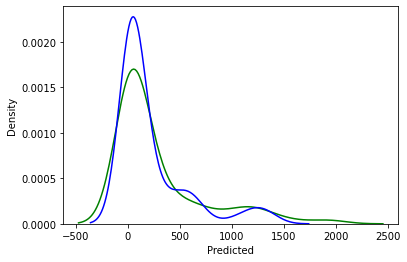

In [271]:
ax1=sns.distplot(model['Actual'],color='g',hist=False,label='Actual')
sns.distplot(model['Predicted'],color='b',hist=False,label='Predicted',ax=ax1)

__Model is overfit, let us tune the model__

## Hypertuning of the model



In [272]:
param={'n_neighbors':range(0,500,5),'weights':['uniform','distance'],
     'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':range(0,500,10)}
grid=GridSearchCV(knr,param_grid=param,cv=5,verbose=1)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

Fitting 5 folds for each of 40000 candidates, totalling 200000 fits
score:  0.35770124357945854
best estimators: KNeighborsRegressor(leaf_size=10, n_neighbors=30)
best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 30, 'weights': 'uniform'}


In [312]:
#we now got the best parameters, lets make the model
knr=KNeighborsRegressor(weights='distance',n_neighbors=30,leaf_size=10,algorithm='auto')
knr.fit(xr_train,yr_train)
pred=knr.predict(xr_test)
print('Mean Squared Error:',mean_squared_error(yr_test,pred))
print('R2 score:',r2_score(yr_test,pred))

Mean Squared Error: 48586.71940702491
R2 score: 0.750912127564628


__r2_score improved from 0.73 to 0.75__

In [306]:
#New df for tuned model to check 
tuned=pd.DataFrame({})
tuned['Actual']=yr_test
tuned['Earlier Prediction']=model['Predicted']
tuned['Predicted']=pred
tuned

,Actual,Earlier Prediction,Predicted
20,17.0,22.632,20.318667
511,750.0,766.000,565.303206
250,28.0,75.000,87.500000
456,186.0,77.600,137.227828
100,20.0,11.500,9.875000
...,...,...,...
331,10.0,35.800,93.767333
218,648.0,369.200,338.157854
677,300.0,181.300,206.841859
492,75.0,62.660,54.787500


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

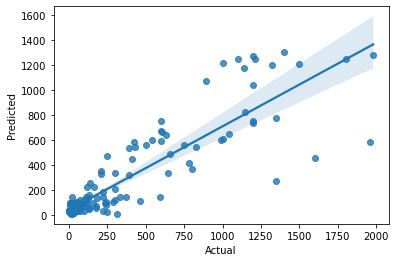

In [313]:
sns.regplot(x='Actual',y='Predicted',data=tuned)


In [314]:
#Let us save the tuned model 
import pickle

In [315]:
filename='power plant reg.pkl'


In [316]:
pickle.dump(knr,open(filename,'wb'))

## Steps: I Followed in the above Dataset.
1- loaded the dataset and checked for shape,datatype information, columns and checked for null /missing value(if any) and took the neccessary step

2-Checked for unique values count and plot a bar of it(count plot)

3-Described the dataset using .describe() method and wrote down the observation for min, max, mean ,std and skewness.

4- Visulise the skewness using distplot and boxplot techniques after cheking it using.skew() method.

4- Used zscore() method to remove outliers and again checked for skewness and found skewness in dataset so used np.log() method and again chekd for skewness .

5-Checked for Multicoliearity and cooreation using .corr() method and heatmap plot and dropped the highly correlated feture

6-Plotted pairplot and visulise the relationship among fature and label


#### For Primary_fuel(Classification)

7- Split the dataset into features and label and applying transormation on feature using StandardScaler method.

8- Found the best random_state and wrote down single function for mulitple model evaluation.

9- Evaluate the different models based on score, f1score

10- Calculated CV score and selected the best model which had least difference between accuracy and CV score(RandomForest).

11- Hypertuned the parameter using GridsearchCV and again calculated the scores and improved the accuracy score saved the model with hypertuned parameter( RandomForest)(from 0.77 to 0.79) .

12- vislauize the model

13- printed confusion Matrix

14-Plotted AUC ROC curve

15- Saved the model using pickle library

16- Compared the predicted and Original values

#### For capacity_mw (Regression)

7- Split the dataset into features and label and applying transormation on feature using MInMaxScaler method.

8- Found the best random_state and wrote down single function for mulitple model evaluation.

9- Evaluate the different models based on score, r2_score and mean_squared_error.

10- Calculated CV score and selected the best model which had least difference between r2_score and CV score(KNN Model).

11- Hypertuned the parameter using GridsearchCV and again calculated the scores and r2score increased( KNN model) xfrom 0.73 to 0.75
12- 

12- vislauize the model

13- Saved the model using pickle library

14- Compared the predicted and Original values


